# 시나리오
- 와인 분류
- 알코올 도수, 당도, pH값으로 와인 종류를 분류
- 로지스틱 회귀를 적용하여 분류 진행

### 데이터 준비
- 캐글의 Red Wine Quality에서 일부를 추출한 데이터

In [1]:
import pandas as pd

wine = pd.read_csv('../data/wine_csv_data.csv')

wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


##### class
- 0이면 레드와인 1이면 화이트와인
- 레드와인과 화이트와인을 분류하는 이진 분류 문제
- 화이트와인이 양성클래스이며 이 화이트와인을 골라내는 문제

#### 정보 확인

In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


#### 기술통계 정보 확인

In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


##### 파악
- 알코올 도수, 당도, pH값의 스케일이 다름

#### 데이터 나누기

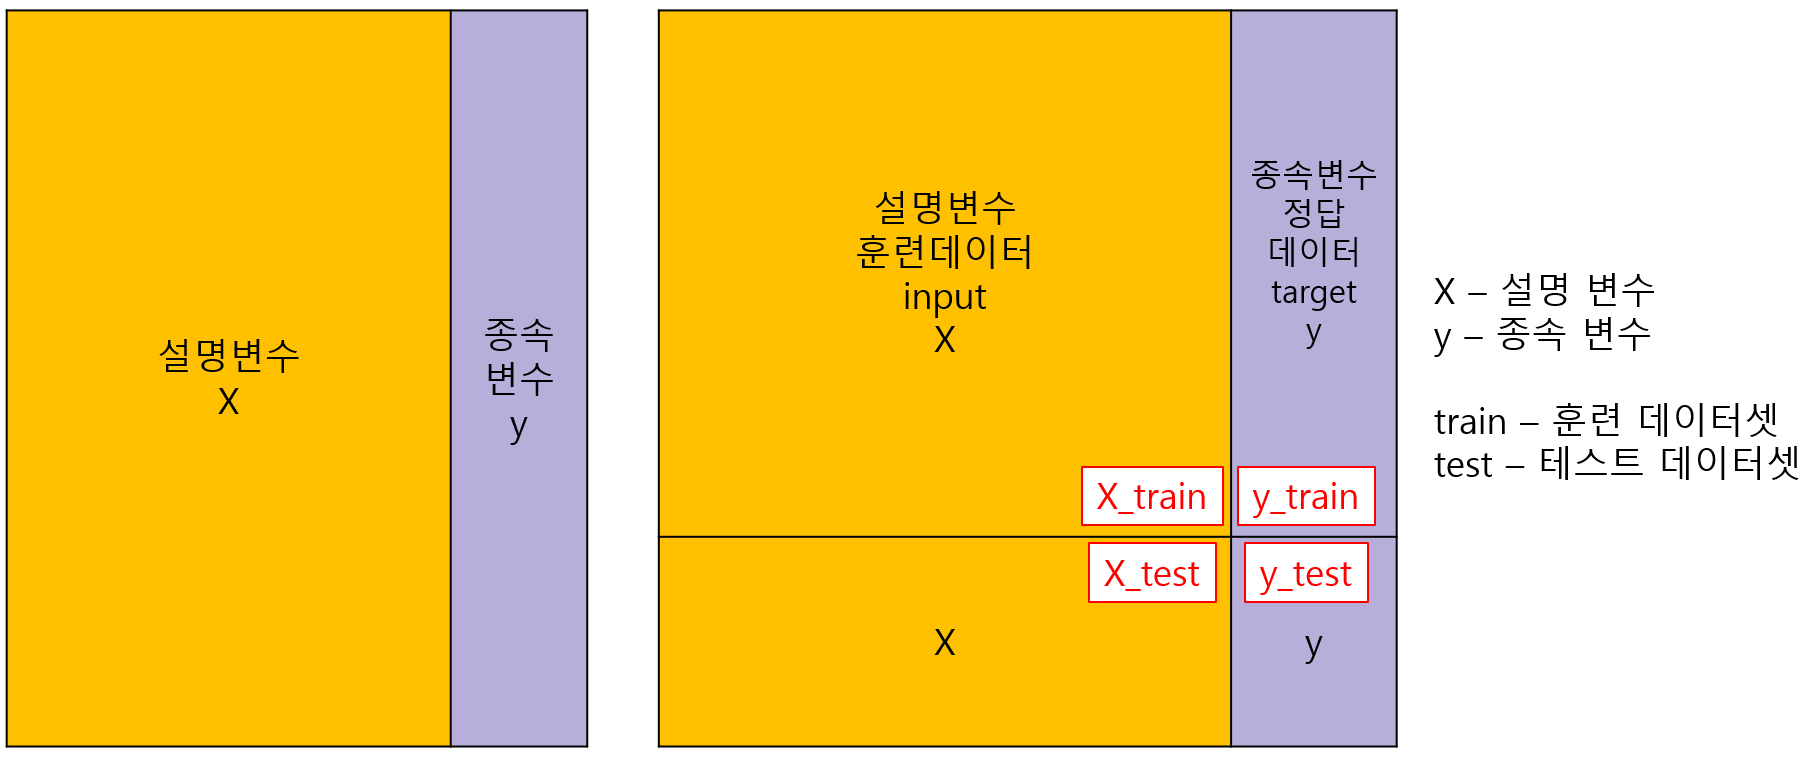
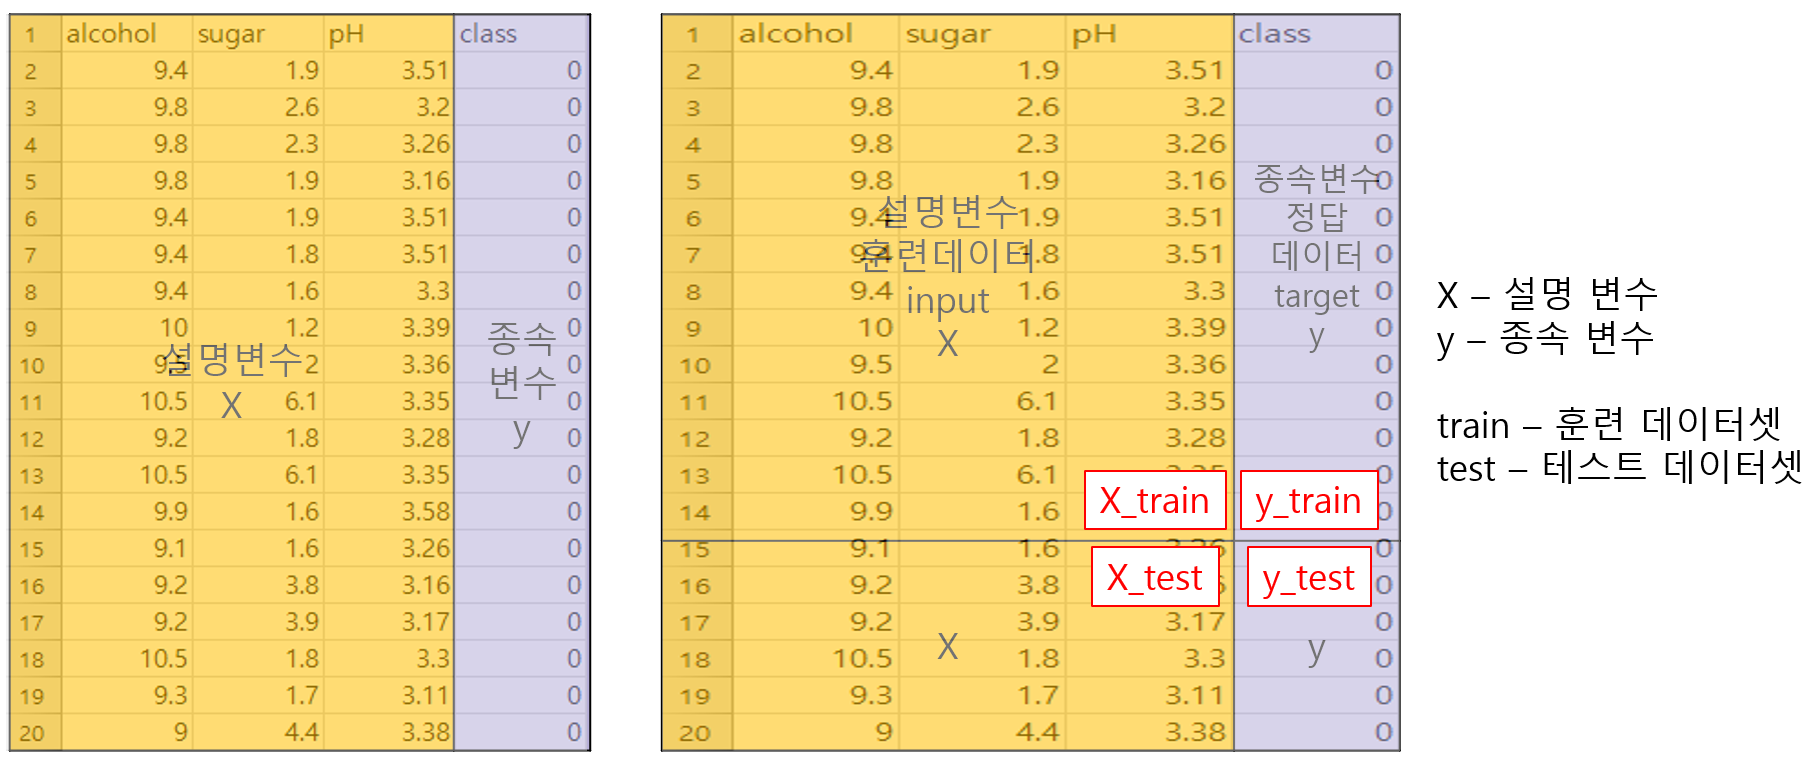

In [4]:
X = wine[['alcohol', 'sugar', 'pH']]
y = wine['class'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split

# train_input, test_input, train_target, test_target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape

((5197, 3), (1300, 3))

#### 데이터 전처리
- 스케일 변경

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [8]:
X_train_scaled

array([[ 0.01376574,  0.4646116 , -0.16888369],
       [ 1.60871671, -0.70299854,  0.26967864],
       [ 1.10504798, -0.70299854,  1.20945505],
       ...,
       [-0.82568214,  0.0267578 ,  0.14437512],
       [-0.82568214,  0.52716215, -0.23153545],
       [-0.82568214, -0.57789745,  1.83597265]])

In [9]:
X_test_scaled

array([[ 1.44082714,  1.52797084,  0.26967864],
       [-0.48990299, -0.68214836,  0.3323304 ],
       [ 1.27293756,  0.40206106, -0.23153545],
       ...,
       [ 1.60871671, -0.76554908, -0.16888369],
       [-0.90962693,  0.88161523,  0.52028568],
       [-1.49724045,  2.09092573, -1.98578474]])

#### 로지스틱 회귀 모델 훈련

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.7808350971714451
0.7776923076923077


##### 결과
- 점수가 좋지 않음
- 훈련세트와 테스트세트의 점수가 모두 낮으므로 과소적합으로 보임
- 과소적합 해결을 위해 다음과 같은 것을 고려
    - 규제 변수(C)의 값 변경
    - solver매개변수로 알고리즘 변경 가능 
    - 다항특성을 만들어 추가

# 시나리오
- 앞서 진행한 내용으로 보고서를 만들고자 함
- 만들어진 모델 설명을 위해 계수와 절편 확인
- 계수와 절편으로 보고서 작성 시 설명이 불편함
- 이를 해결하기 위해 결정 트리를 고려

In [11]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


## 결정트리(Decision Tree)
- 조건에 따른 분류 결정을 트리 구조로 표현
- 스무고개와 같은 개념으로 분류
- 설명이 쉬움
- 랜덤포레스트, 앙상블의 기반

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

0.996921300750433
0.8592307692307692


##### 결과
- 훈련 세트에 대한 점수가 매우 높음
- 테스트 세트에 대한 점수는 다소 낮음

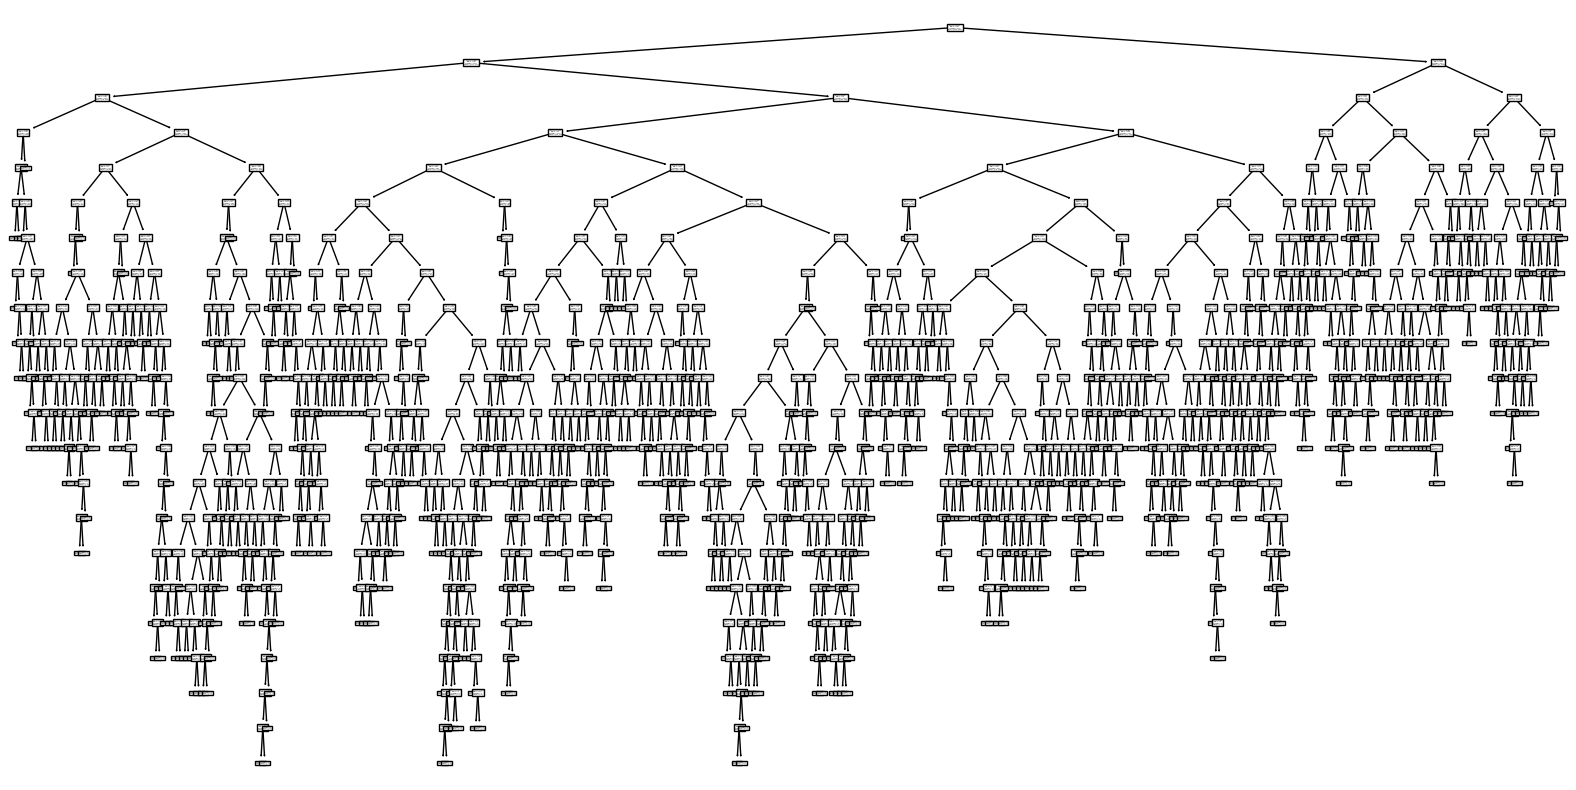

In [13]:
# plot_tree() 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt)
plt.show()

### 트리 용어
- 노드
- 루트
- 잎
- 형제
- 자식
- 조상
- 자손
- 차수
- 깊이
- 높이

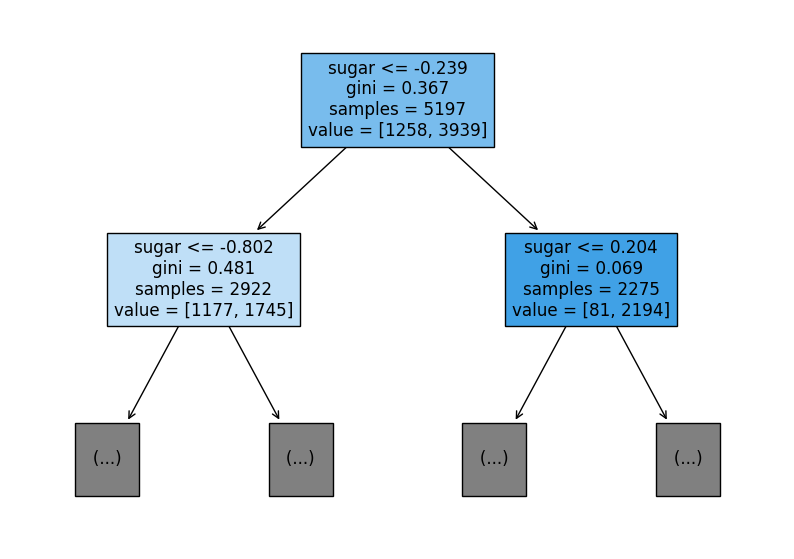

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 음성 클래스(레드)는 왼쪽 양성 클래스(화이트)는 오른쪽 가지로 나눠짐
- 리프 노드에서 가장 많은 클래스가 예측 클래스
- 트리의 깊이를 제어하여 분류를 종료
- 만약 결정트리를 회귀에 적용하면 리프 노드에 도달한 샘플의 타겟 평균으로 예측(DecisionTreeRegressor)
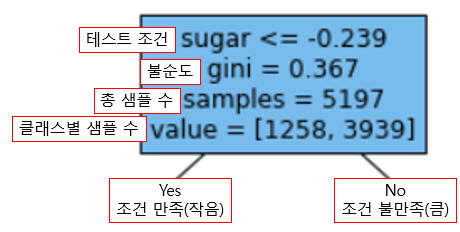

### 지니 불순도(Gini impurity)
- criterion 매개변수에 지정됨(gini 디폴트)
- 데이터를 분할할 기준이 지니계수라는 의미(엔트로피 지수를 사용하기도 함)
- 엔트로피 지수를 사용하는 경우 제곱이 아닌 로그를 사용

#### 지니 불순도
- 클래스의 비율을 제곱하여 더한 후 1에서 뺌  
$ 지니불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2) $
    
    
    - 루트 노드의 값 지니계수 계산 예시  
$ 1 - ( (\frac{1258}{5197})^2 + (\frac{3939}{5197})^2 ) = 0.367 $
   

    - 100개의 샘플이 있는 어떤 노드의 두 클래스 비율이 1/2이라면 0.5로 최악
$ 1 - ( (\frac{50}{100})^2 + (\frac{50}{100})^2 ) = 0.5 $
    
       
    - 노드에 하나의 클래스만 있는 경우 불순도는 0
$ 1 - ((\frac{0}{100})^2 + (\frac{100}{100})^2) = 0 $


- 결정트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 생성
- 부모 노드와 자식 노드의 불순도 차이를 <b>정보 이득(information gain)</b>이라 함
- 부모 노드와 자식 노드의 불순도 차이 계산 방법
    - 자식 노드의 불순도를 샘플 개수에 비례하여 합을 구하고 부모 불순도에서 뺌
        - 루트를 부모라 하고 계산 예시
        
        
$ 불순도차이 = 부모의불순도 - (\frac{왼쪽노드 샘플 수}{부모 샘플 수}) \times 왼쪽 노드 불순도 - (\frac{오른쪽노드 샘플 수}{부모의 샘플 수}) \times 오른쪽노드 불순도$
$ 0.367 - (\frac{2922}{5197}) \times 0.481 - (\frac{2275}{5197}) \times 0.069 = 0.066 $


### 결정트리 알고리즘의 핵심
- 불순도 기준을 사용해 정보 이득이 최대가 되도록 노드를 분할
- 노드를 순수하게 나눌수록 정보 이득이 커짐
- 새로운 샘플을 예측하는 경우 노드의 질문에 따라 트리를 이동
- 마지막에 도달한 클래스의 비율을 보고 예측
- 트리의 깊이 제한이 없으면 과적합 발생

## 가지치기
- 앞의 결정트리 모델은 일반화가 잘 되지 않았다고 할 수 있음
- 트리의 깊이를 정하여 과적합을 방지
- max_depth 파라미터 사용

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

0.8454877814123533
0.8415384615384616


##### 결과
- 훈련 세트의 성능은 과적합이 해소된 것으로 보임
- 이전 테스트 결과와 비교  
    0.996921300750433  
    0.8592307692307692  
- 테스트 세트의 성능은 큰 변화 없음

In [16]:
X.columns

Index(['alcohol', 'sugar', 'pH'], dtype='object')

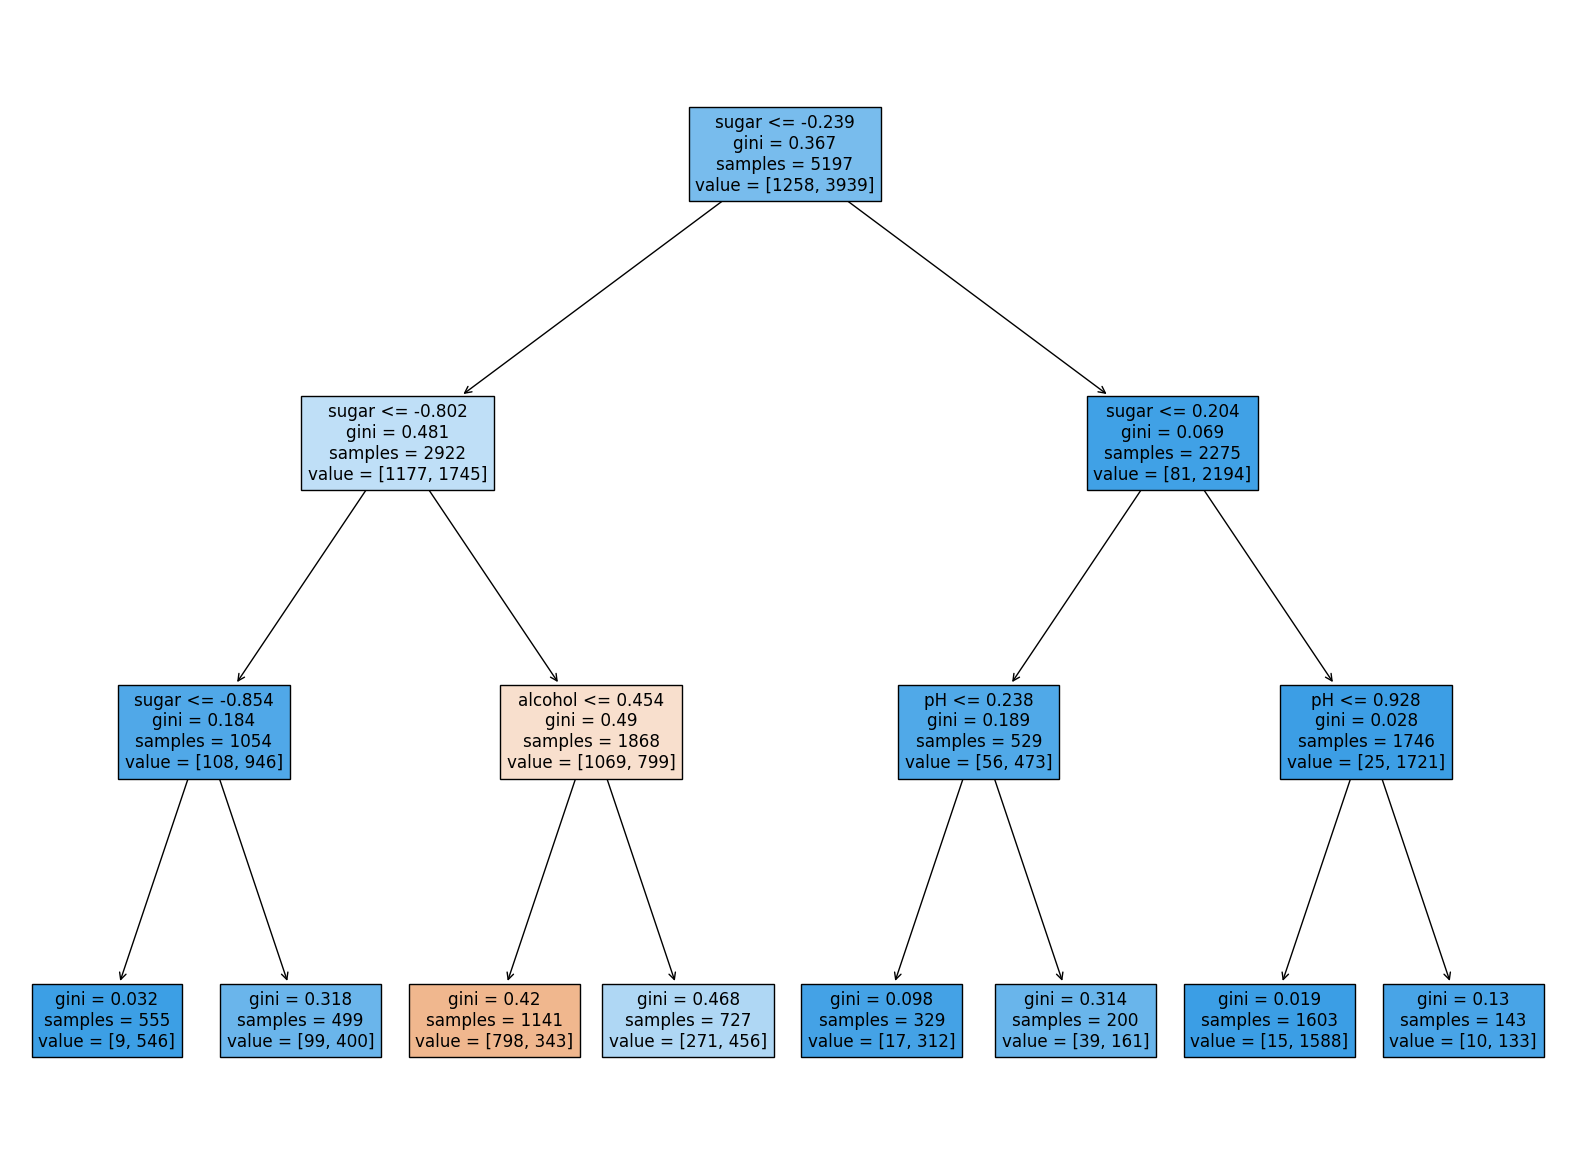

In [17]:
# 그래프로 확인
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

##### 해석
- 깊이 1의 노드는 모두 sugar를 기준으로 훈련 세트를 나눔
- 깊이 2의 노드는 맨 왼쪽의 노드는 sugar로 나누고   
    두 번째 노드는 alcohol을 기준으로 나눔
    나머지는 pH로 나눔
- 깊이 3에 있는 노드는 최종 노드(leaf)
- 세 번째 노드만 음성 클래스가 많음(이 노드에 맞으면 레드와인으로 예측)
    - 이 노드에서 레드와인으로 분류된다는 것은  
        1) -0.802 <= 당도 <= -0.239  
        2) 알콜도수 <= 0.454  
        - 1) 조건과 2)조건에 만족하면 레드와인
        

In [18]:
# 특성 중요도 확인 ['alcohol', 'sugar', 'pH']
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

#### 특성 중요도
- 결정트리에 사용된 특성이 불순도를 감소시키는데 기여한 정도를 나타낸 값
- 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산
- 특성 중요도를 이용하여 특성 선택에 결정트리를 이용할 수도 있음
- sugar > alcohol > pH 순서의 중요도를 가짐

#### 확인
- 결정트리에서 스케일링은 결과에 영향을 주지 않으므로 표준화 전처리가 반드시 필요하지 않음

0.8454877814123533
0.8415384615384616
['alcohol' 'sugar' 'pH']
[0.12345626 0.86862934 0.0079144 ]


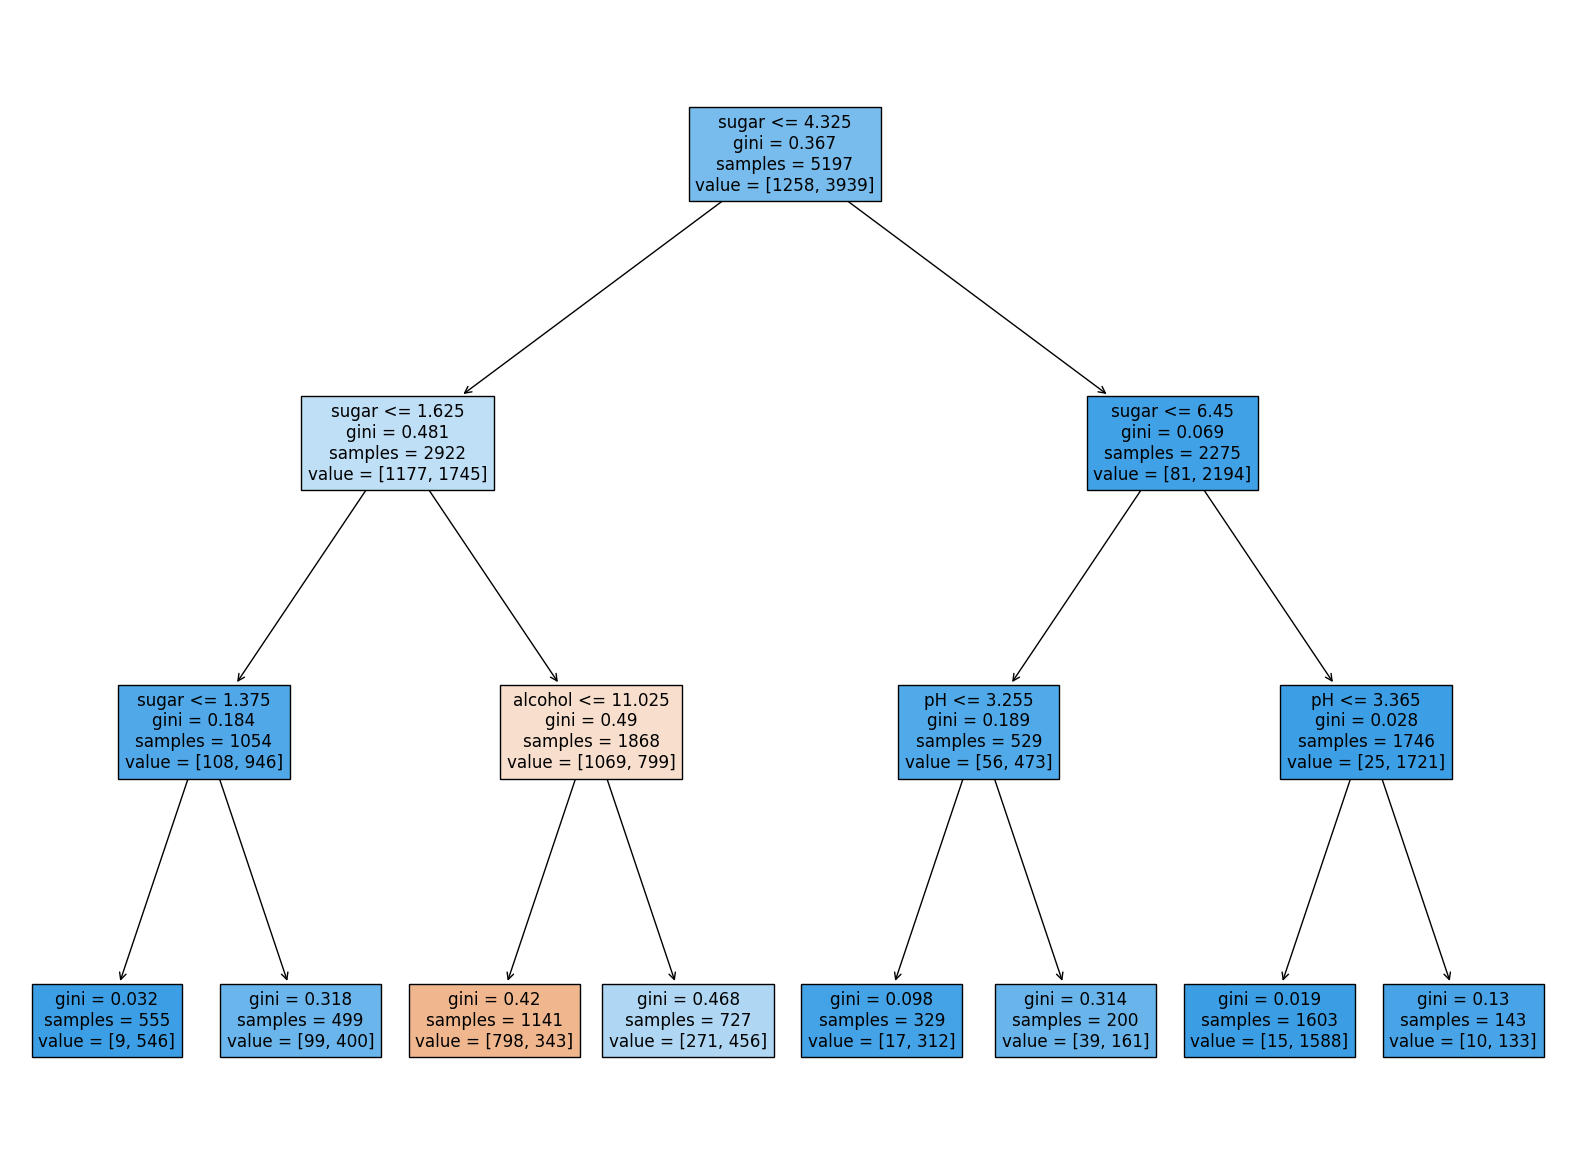

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
print(dt.feature_names_in_)
print(dt.feature_importances_)

# 그래프로 확인
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [20]:
sum(dt.feature_importances_) # 특성 중요도를 모두 더하면 1

1.0

### 추가 실습으로 생각해보기
- min_impurity_decrease 파라미터를 사용하여 가지치기(최소 불순도 지정)
- $ 어떤 노드의 정보이득 * \frac{노드의 샘플 수}{전체 샘플 수} $ 값이 이 매개변수보다 작으면 더 이상 분할 하지 않음
- 0.0005로 설정하여 트리 모델 생성
- 그래프 및 테스트 세트 점수 확인

0.8874350586877044
0.8615384615384616


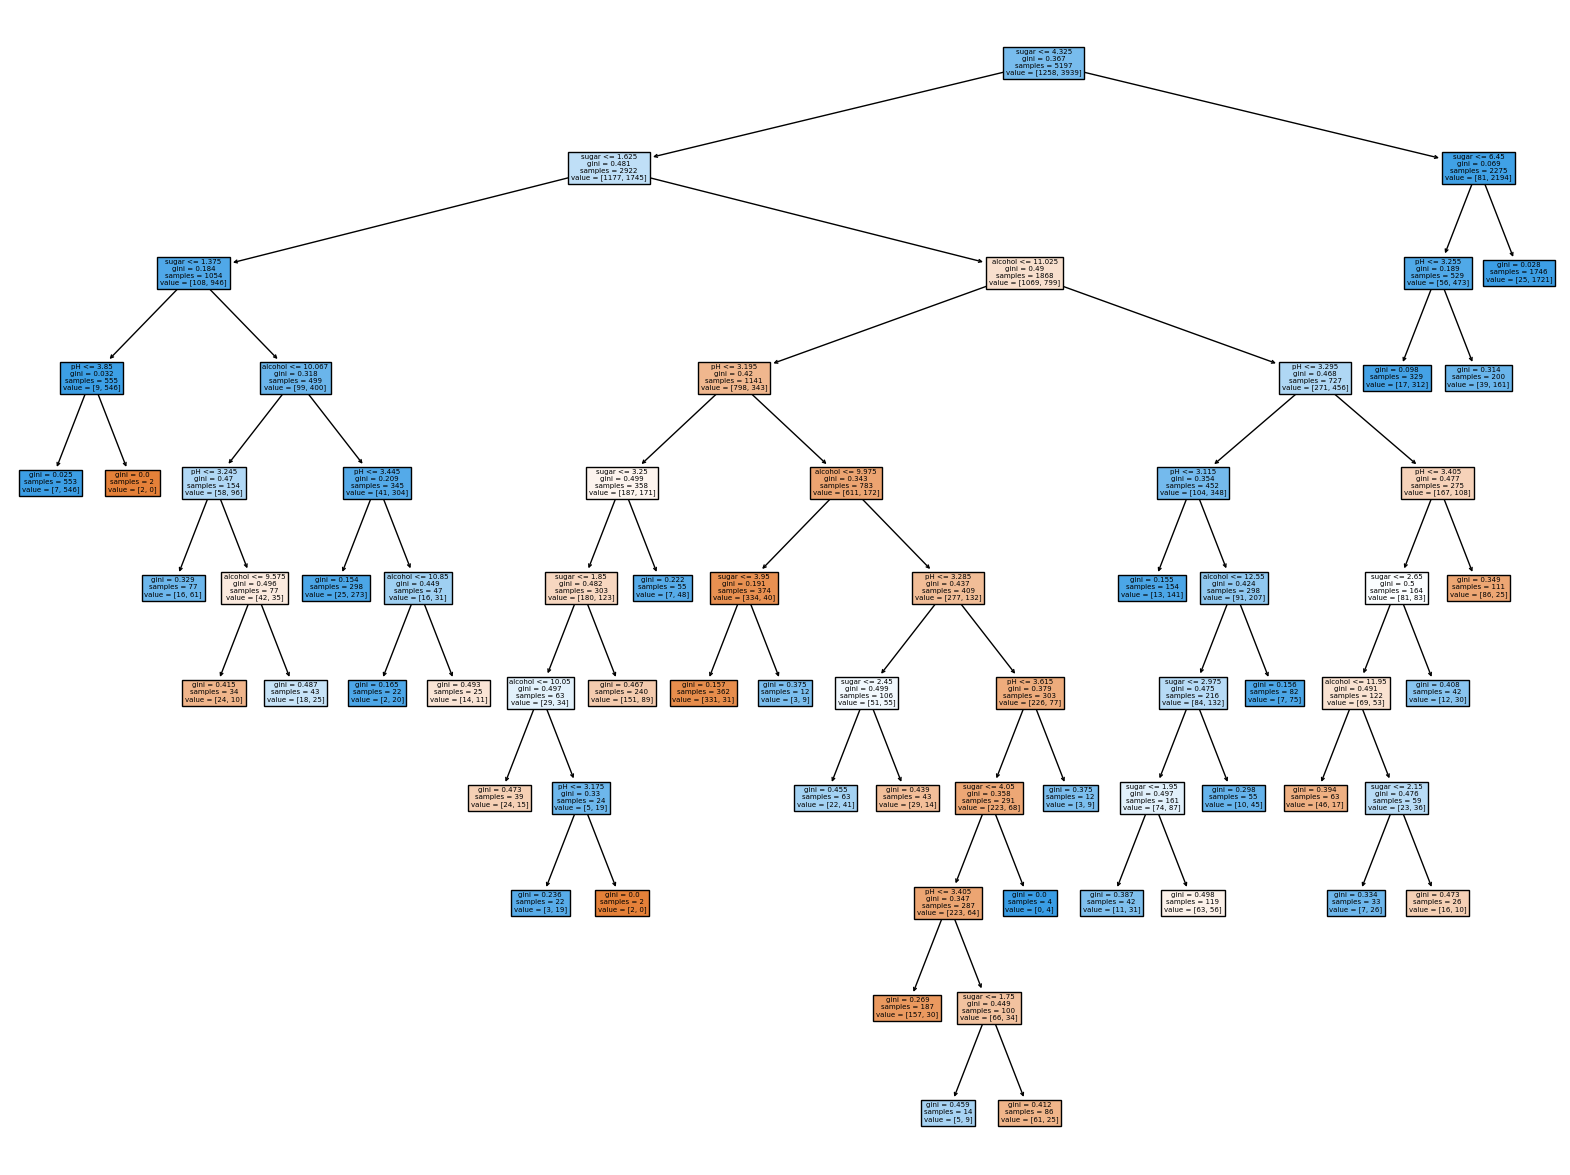

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()


##### 해석
- 이전보다 테스트 세트의 정확도는 약간 향상되었음
- 과대적합은 약간 있어보임(최대 깊이 설정이 없으므로)
- max_depth와 min_impurity_decrease를 같이 적절하게 설정하면 좋을 것으로 판단됨

0.8668462574562248
0.8623076923076923


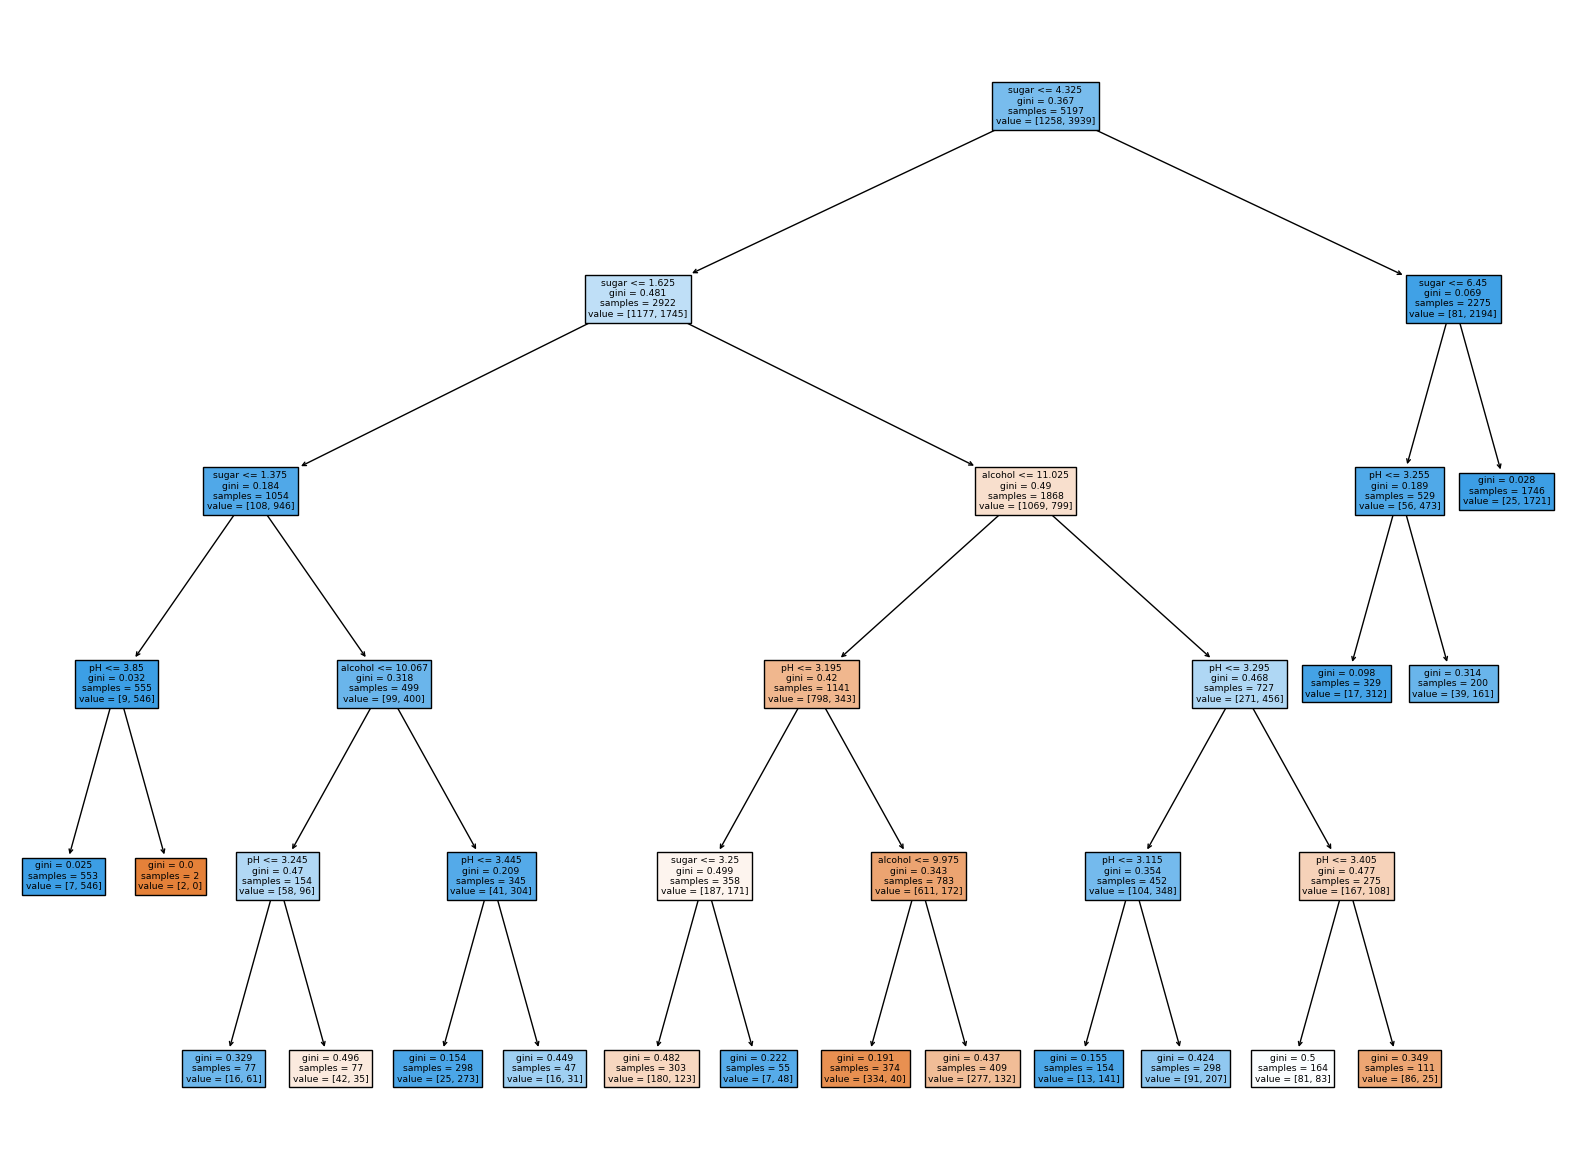

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.0005, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()


##### 해석
- 이전보다 더 좋은 모델이 된 것으로 파악됨
- 두 파라미터 값을 조절하면 더 좋은 모델이 될 수 있을까?
- 두 파라미터의 값은 어떻게 정하면 좋을까?